## <center>Computer Science Intensive Course - MindX</center>
![](./assets/logo.png)
# <center>BÀI 6. THUẬT TOÁN SẮP XẾP (2)</center>

In [1]:
# run this cell FIRST
import matplotlib.pyplot as plt

def show_list(arr, title=''):
    fig, ax = plt.subplots(figsize=(20, 4))
    ax.bar(range(len(arr)), arr)
    ax.set_title(title)
    ax.set_xlabel('index')
    ax.set_xticks(range(len(arr)))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

# 1. Merge Sort

**Bài toán**: Như các thuật toán đã học, Merge Sort (sắp xếp trộn) xử lý bài toán sắp xếp dãy bất kỳ bằng phương pháp so sánh các phần tử.  
Cho một dãy gồm *0 < n < 10<sup>6</sup>* số nguyên, mỗi số có giá trị trong khoảng [0, 10<sup>9</sup>], sắp xếp dãy trên theo thứ tự tăng dần.

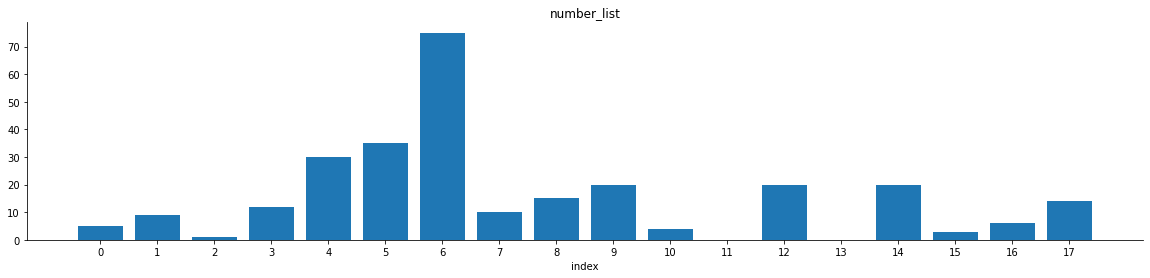

In [4]:
number_list = [5, 9, 1, 12, 30, 35, 75, 10, 15, 20, 4, 0, 20, 0, 20, 3, 6, 14]
show_list(number_list, title='number_list')

**Cách tiếp cận** của Merge Sort sử dụng phương pháp *chia để trị*:
1. Chia dãy cần sắp xếp thành hai phần có độ dài tương đương nhau.
2. Sắp xếp riêng từng phần.
3. Nhập hai phần đã sắp xếp lại.  

Ở bước 2, thuật toán cũng dùng Merge Sort để tiếp tục sắp xếp riêng từng phần cho đến khi các phần được chia nhỏ đến kích thước bằng 1 (xem như đã được sắp xếp).  

Nhờ phương pháp này, Merge Sort có độ phức tạp về thời gian là *O(n.log(n))*, nhanh hơn rất nhiều so với các thuật toán ở bài học trước.  

Sơ đồ cây thể hiện quá trình xử lý của Merge Sort:
![](./assets/merge-sort.png)
<div style='text-align: right'><i>Ảnh: geeksforgeeks.org/merge-sort/</i></div>

Visualization: https://visualgo.net/en/sorting, thuật toán thứ tư.

### Code:

In [5]:
# merge 2 sorted portions of arr
def merge(arr, left, right, mid):

    # make shallow copy of 2 portions for convenient merging
    arr1 = arr[left:mid]
    arr2 = arr[mid:right]
    
    n1 = len(arr1)
    n2 = len(arr2)
    i = j = 0
    k = left
 
    # traverse arr1 and arr2 until one is empty
    while i < n1 and j < n2:
        if arr1[i] < arr2[j]:
            arr[k] = arr1[i]
            i += 1
        else:
            arr[k] = arr2[j]
            j += 1
        k +=  1
     
    # get remaining elements
    arr[k:k+n1-i] = arr1[i:n1]
    k += n1-i
    arr[k:k+n2-j] = arr2[j:n2]
    

def merge_sort(arr, left, right):
    
    # special cases, arr is sorted
    if right-left <= 1:  # stop condition for recursion
        return
    
    # split arr into 2 halves, then sort each half individually
    mid = (left+right)//2
    merge_sort(arr, left, mid)   # recursive call
    merge_sort(arr, mid, right)  # recursive call

    # merge 2 sorted halves
    merge(arr, left, right, mid)

Before sorting: [5, 9, 1, 12, 30, 35, 75, 10, 15, 20, 4, 0, 20, 0, 20, 3, 6, 14]
After sorting:  [0, 0, 1, 3, 4, 5, 6, 9, 10, 12, 14, 15, 20, 20, 20, 30, 35, 75]


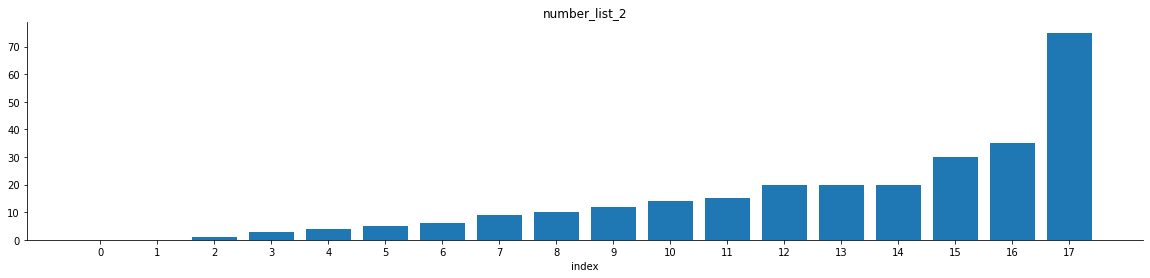

In [6]:
number_list_2 = number_list[:]

merge_sort(number_list_2, 0, len(number_list_2))

print("Before sorting: {}".format(number_list))
print("After sorting:  {}".format(number_list_2))
show_list(number_list_2, title='number_list_2')

**Độ phức tạp thời gian**:
- Việc tính toán độ phức tạp thời gian của Merge Sort khá phức tạp, tuy nhiên ta có thể hiểu đơn giản bằng cách dựa vào hình minh họa phía trên.
- Từ tầng trên cùng đến tầng giữa:
  + Ở mỗi tầng, ta tách từng đoạn thành hai phần. Dù số lần tách ở mỗi tầng khác nhau, ta có thể tính được có tổng cộng *n-1* lần tách được thực hiện từ tầng trên cùng đến tầng giữa. Với code trên, mỗi lần tách có độ phức tạp *O(1)*.
  + Như vậy, độ phức tạp từ tầng trên cùng đến tầng giữa là *O(n-1)* = *O(n)*.
- Từ tầng giữa đến tầng cuối:
  + Ở mỗi tầng, ta nhập hai dãy liền kề nhau thành một. Cho dù mỗi tầng có bao nhiêu dãy, ta đều truy vấn qua *n* phần tử để thực hiện phép so sánh và phép gán vào dãy mới. Do đó, độ phức tạp ở mỗi tầng là *O(n)*.
  + Tương tự như với thuật toán *Binary Search*, ta tính được số tầng từ giữa đến cuối xấp xỉ *log<sub>2</sub>(n)*.
  + Tổng cộng, độ phức tạp từ tầng giữa đến cuối là:
    \begin{equation} O(n).log_2(n) = O(n.log(n)) \end{equation}
- Tổng hợp, độ phức tạp về thời gian của thuật toán là:
  \begin{equation} O(n)+O(n.log(n)) = O(n.log(n)) \end{equation}

**Độ phức tạp không gian**:
- Thuật toán lưu trữ danh sách gốc với *O(n)* bộ nhớ.
- Ta thực hiện gộp hai đoạn đã được sắp xếp bằng cách tạo thêm hai mảng phụ *arr1* và *arr2*. Như vậy, trong một thời điểm, thuật toán cần ghi nhớ hai mảng phụ với tổng kích thước lớn nhất bằng danh sách gốc (khi gộp lần cuối cùng). Việc ghi nhớ chiếm *O(n)* bộ nhớ.
- Ngoài ra, thuật toán cũng chiếm *log<sub>2</sub>(n)* vùng nhớ stack do việc gọi đệ quy.
- Do đó, độ phức tạp về không gian của thuật toán là:
  \begin{equation} O(n) + O(n) + O(log_2(n)) = O(n) \end{equation}

**Mở rộng**:
- Ta có thể thực hiện gộp hai đoạn mà không sử dụng mảng phụ bằng một thuật toán phức tạp hơn (xem thêm: *geeksforgeeks.org/merge-sort-with-o1-extra-space-merge-and-on-lg-n-time/*). Tuy nhiên phương pháp hiện tại phù hợp hơn để ta tìm hiểu về cách hoạt động chung của Merge Sort.
- Ta cũng có thể thực hiện Merge Sort mà không gọi đệ quy.
- Một trong những biến thể khác của Merge Sort là chia dãy cần sắp xếp thành ba phần có độ dài tương đương nhau, thay vì hai phần như hiện tại.

# 2. Quicksort

**Bài toán**: Quicksort (sắp xếp nhanh) cũng xử lý bài toán như Merge Sort nhưng bằng một cách tiếp cận khác.

**Cách tiếp cận** của Quicksort cũng sử dụng phương pháp *chia để trị*:
1. Chọn một phần tử trong dãy làm mốc.
2. Đem tất cả các phần tử nhỏ hơn hoặc bằng mốc về phía bên trái, như vậy các phần tử lớn hơn hoặc bằng mốc nằm bên phải.
3. Sắp xếp riêng từng phần bên trái và phải.

**Nhận xét**:
- Sau khi thực hiện xong bước 2, do tất cả phần tử bên trái đều nhỏ hơn phần tử bên phải, ta không cần thực hiện bước trộn hai phần như Merge Sort.
- Ở bước 1, ta có một số cách thông dụng để chọn mốc:
  + Chọn phần tử đầu tiên (bên trái)
  + Chọn phần tử cuối cùng (bên phải)
  + Chọn phần tử chính giữa
  + Chọn phần tử ngẫu nhiên  
  Ảnh minh họa dùng cách chọn phần tử cuối cùng. Visualization và code phía dưới dùng cách chọn phần tử đầu tiên.
  
![](./assets/quick-sort.png)
<div style='text-align: right'><i>Ảnh: geeksforgeeks.org/quick-sort/</i></div>

Visualization: https://visualgo.net/en/sorting, thuật toán thứ năm.

### Code:

In [7]:
# choose pivot, move every smaller element to the left side
# return the index of pivot after moving
def partition(arr, left, right):
    pivot = arr[left]  # choose pivot as the left-most element
    i = left
    for j in range(left+1, right):
        if arr[j] < pivot:  # if found smaller element...
            i += 1
            arr[i], arr[j] = arr[j], arr[i]  # ... move it to the left side
    arr[i], arr[left] = arr[left], arr[i]    # after finishing, swap pivot to its position
    return i


def quick_sort(arr, left, right):
    
    if right-left <= 1:  # array already sorted / stop condition for recursion
        return
    
    # split arr into 2 parts
    partition_index = partition(arr, left, right)
    
    # sort each part individually
    quick_sort(arr, left, partition_index)     # recursive call
    quick_sort(arr, partition_index+1, right)  # recursive call

Before sorting: [5, 9, 1, 12, 30, 35, 75, 10, 15, 20, 4, 0, 20, 0, 20, 3, 6, 14]
After sorting:  [0, 0, 1, 3, 4, 5, 6, 9, 10, 12, 14, 15, 20, 20, 20, 30, 35, 75]


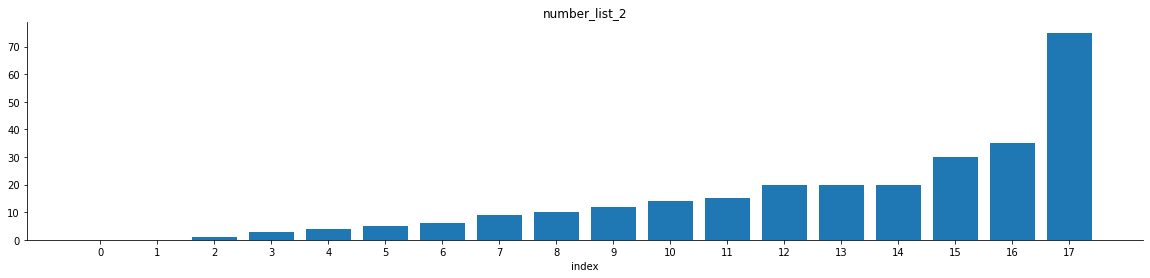

In [8]:
number_list_2 = number_list[:]

quick_sort(number_list_2, 0, len(number_list_2))

print("Before sorting: {}".format(number_list))
print("After sorting:  {}".format(number_list_2))
show_list(number_list_2, title='number_list_2')

**Độ phức tạp thời gian**:
- Quicksort có độ phức tạp về thời gian trong trường hợp xấu nhất là *O(n<sup>2</sup>)*. Trường hợp này xảy ra khi giá trị mốc *pivot* được chọn luôn luôn là giá trị lớn nhất hoặc nhỏ nhất trong dãy. Khi đó, mỗi lần gọi Quicksort, ta chỉ thu hẹp được đoạn cần sắp xếp xuống một phần tử là *pivot*.
- Tuy nhiên, trong trường hợp trung bình, Quicksort được chứng minh có độ phức tạp là *Θ(n.log(n))*, do sử dụng cơ chế *chia để trị* tương tự như Merge Sort.

**Độ phức tạp không gian**:
- Thuật toán lưu trữ danh sách gốc với *O(n)* bộ nhớ.
- Quicksort không cần lưu mảng phụ như Merge Sort. Tuy nhiên, thuật toán cũng chiếm *log<sub>2</sub>(n)* vùng nhớ stack do việc gọi đệ quy.
- Do đó, độ phức tạp về không gian của thuật toán là:
  \begin{equation} O(n) + O(log_2(n)) = O(n) \end{equation}

**Mở rộng**:
- Quicksort theo cách cài đặt thông thường là một thuật toán *không ổn định*. Tức nếu tồn tại hai hoặc nhiều phần tử bằng nhau trong dãy, Quicksort không đảm bảo vị trí tương đối của các phần tử đó sau khi sắp xếp (phần tử ở sau có thể được đem lên trước và ngược lại).
- Ta có thể thực hiện Quicksort mà không gọi đệ quy.
- Mặc dù trường hợp xấu nhất của Quicksort có độ phức tạp *O(n<sup>2</sup>)*, Quicksort vẫn được dùng trong thực tế vì nó có thể chạy tốt trên nhiều kiến trúc máy tính khác nhau và trên dữ liệu thực tế.
- Ta có thể ngăn Quicksort rơi vào trường hợp xấu nhất bằng cách thay đổi cách chọn mốc. Một trong những cách đơn giản nhất là chọn mốc ngẫu nhiên.
- Quicksort có tên "quick" do nó nhanh hơn hầu hết các thuật toán sắp xếp cùng thời. Hiện nay, Quicksort vẫn được dùng phổ biến nhưng cái tên "quick" không thể hiện đây là thuật toán sắp xếp nhanh nhất.

# 3. Thực Hành

## 3.1. Merge Sort

**Yêu cầu**: Cho danh sách điểm của học sinh với định dạng bên dưới. Hãy thay đổi code của thuật toán Merge Sort trong bài học để sắp xếp danh sách theo thứ tự điểm Toán tăng dần.

In [9]:
student_grade_list = [
    {'id': 984, 'math': 9.0, 'literature': 5.4},
    {'id': 12, 'math': 9.5, 'literature': 4.3},
    {'id': 324, 'math': 9.7, 'literature': 5.3},
    {'id': 890, 'math': 5.0, 'literature': 7.6},
    {'id': 223, 'math': 7.6, 'literature': 5.3},
    {'id': 543, 'math': 7.2, 'literature': 7.7},
]

In [10]:
def is_before(student1, student2):
    return student1['math'] > student2['math']

def merge_v2(arr, left, right, mid):

    # make shallow copy of 2 portions for convenient merging
    arr1 = arr[left:mid]
    arr2 = arr[mid:right]
    
    n1 = len(arr1)
    n2 = len(arr2)
    i = j = 0
    k = left
 
    # traverse arr1 and arr2 until one is empty
    while i < n1 and j < n2:
        if is_before(arr1[i], arr2[j]):
            arr[k] = arr1[i]
            i += 1
        else:
            arr[k] = arr2[j]
            j += 1
        k +=  1
     
    # get remaining elements
    arr[k:k+n1-i] = arr1[i:n1]
    k += n1-i
    arr[k:k+n2-j] = arr2[j:n2]
    

def merge_sort_v2(arr, left, right):
    
    # special cases, arr is sorted
    if right-left <= 1:  # stop condition for recursion
        return
    
    # split arr into 2 halves, then sort each half individually
    mid = (left+right)//2
    merge_sort_v2(arr, left, mid)   # recursive call
    merge_sort_v2(arr, mid, right)  # recursive call

    # merge 2 sorted halves
    merge_v2(arr, left, right, mid)
    
    
# driver code
merge_sort_v2(student_grade_list, 0 , len(student_grade_list))
student_grade_list

[{'id': 324, 'math': 9.7, 'literature': 5.3},
 {'id': 12, 'math': 9.5, 'literature': 4.3},
 {'id': 984, 'math': 9.0, 'literature': 5.4},
 {'id': 223, 'math': 7.6, 'literature': 5.3},
 {'id': 543, 'math': 7.2, 'literature': 7.7},
 {'id': 890, 'math': 5.0, 'literature': 7.6}]

## 3.2. Quicksort

**Yêu cầu**: Hãy thay đổi code của thuật toán Quicksort trong bài học để chọn *pivot* là phần tử cuối cùng bên phải của dãy.

In [11]:
def partition_right(arr, left, right):
    pivot = arr[right-1]  # choose pivot as the right-most element
    i = left-1
    for j in range(left, right-1):
        if arr[j] < pivot:  # if found smaller element...
            i += 1
            arr[i], arr[j] = arr[j], arr[i]  # ... move it to the left side
    arr[i+1], arr[right-1] = arr[right-1], arr[i+1]  # after finishing, swap pivot to its position
    return i+1


def quick_sort_right(arr, left, right):
    
    if right-left <= 1:  # array already sorted / stop condition for recursion
        return
    
    # split arr into 2 parts
    partition_index = partition_right(arr, left, right)
    
    # sort each part individually
    quick_sort_right(arr, left, partition_index)     # recursive call
    quick_sort_right(arr, partition_index+1, right)  # recursive call

Before sorting: [5, 9, 1, 12, 30, 35, 75, 10, 15, 20, 4, 0, 20, 0, 20, 3, 6, 14]
After sorting:  [0, 0, 1, 3, 4, 5, 6, 9, 10, 12, 14, 15, 20, 20, 20, 30, 35, 75]


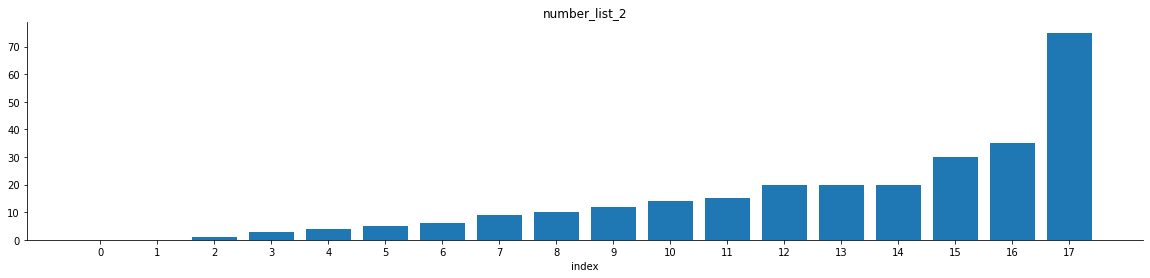

In [12]:
number_list_2 = number_list[:]

quick_sort_right(number_list_2, 0, len(number_list_2))

print("Before sorting: {}".format(number_list))
print("After sorting:  {}".format(number_list_2))
show_list(number_list_2, title='number_list_2')